In [1]:
%matplotlib inline

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [48]:
confirmed = pandas.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
deaths = pandas.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
recovered = pandas.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

population = pandas.read_excel("population.xlsx")

In [53]:
ppl = {country.lstrip(): pop for country, pop in zip(population["Country or area"], population["Population"])}
# ppl["Mainland China"] = ppl.pop("China")
ppl["US"] = ppl.pop('United States')
# ppl["Iran"] = ppl.pop('Iran')
ppl["Hong Kong SAR"] = ppl.pop('Hong Kong')
ppl["Taiwan*"] = ppl.pop('Taiwan')
# ppl["UK"] = ppl.pop('United Kingdom')
ppl["Korea, South"] = ppl.pop('South Korea')
# ppl["Korea, South"] = ppl.pop('South Korea')

In [54]:
countries = list(set(list(confirmed["Country/Region"])))
confirmed_dict = dict()
deaths_dict = dict()
recovered_dict = dict()
for country in countries:
    confirmed_dict[country] = confirmed[confirmed["Country/Region"]==country].sum()
    deaths_dict[country] = deaths[deaths["Country/Region"]==country].sum()
    recovered_dict[country] = recovered[recovered["Country/Region"]==country].sum()

In [55]:

#現在の最大表示行数の出力
pandas.get_option("display.max_rows")

#最大表示行数の指定（ここでは50行を指定）
pandas.set_option('display.max_rows', 50)

In [67]:
latest_date = confirmed.columns[-1]
# pandas.options.display.float_format = '{:.3f}'.format
latest = pandas.DataFrame([[country, 
                            confirmed_dict[country][latest_date], 
                            deaths_dict[country][latest_date], 
                            recovered_dict[country][latest_date]] for country in countries], columns=["country", "confirmed", "deaths", "recovered"])
latest["death_rate"] = latest["deaths"]/latest["confirmed"]
latest["recovered_rate"] = latest["recovered"]/latest["confirmed"]
latest["population"] = [int(ppl[_]) if _ in ppl.keys() else None for _ in latest["country"]]
latest["confirmed_rate"] = latest["confirmed"]/latest["population"] if latest["population"] is not None else None

styled = {'population': "{:.0f}", 
                     'confirmed_rate': '{:.3%}', 
                     'death_rate': '{:.3%}', 
                     'recovered_rate': '{:.3%}'
                    }
# pd = latest.sort_values("deaths", ascending=False)
pd = latest[latest["confirmed"]>100].sort_values("death_rate", ascending=False)
# pd = latest.sort_values("recovered_rate", ascending=False)
# pd = latest.sort_values("confirmed_rate", ascending=False)
pd.style.format(styled)

,country,confirmed,deaths,recovered,death_rate,recovered_rate,population,confirmed_rate
135,San Marino,119,11,4,9.244%,3.361%,33860,0.351%
38,Italy,41035,3405,4440,8.298%,10.820%,60550075,0.068%
85,Indonesia,311,25,11,8.039%,3.537%,270625568,0.000%
78,Philippines,217,17,8,7.834%,3.687%,108116615,0.000%
35,Iran,18407,1284,5710,6.976%,31.021%,82913906,0.022%
41,Iraq,192,13,43,6.771%,22.396%,39309783,0.000%
68,United Kingdom,2716,138,67,5.081%,2.467%,67530172,0.004%
128,Spain,17963,830,1107,4.621%,6.163%,46736776,0.038%
83,China,81156,3249,70535,4.003%,86.913%,1433783686,0.006%
54,Japan,924,29,150,3.139%,16.234%,126860301,0.001%


Text(0, 0.5, 'New Confirmed')

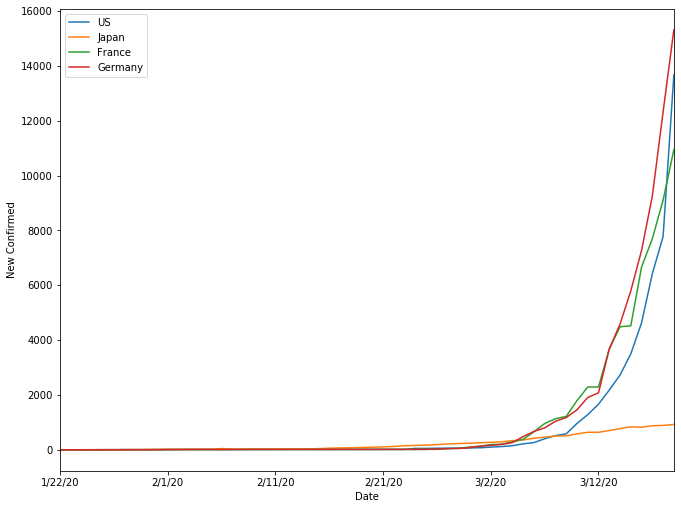

In [8]:
latest_date = confirmed.columns[-1]


plt.figure(figsize=(11, 8.5))
confirmed[confirmed["Country/Region"]=="US"].sum()['1/22/20': latest_date].plot(label="US")
confirmed[confirmed["Country/Region"]=="Japan"].sum()['1/22/20': latest_date].plot(label="Japan")
# confirmed[confirmed["Country/Region"]=="Italy"].sum()['1/22/20': latest_date].plot(label="Italy")
# confirmed[confirmed["Country/Region"]=="South Korea"].sum()['1/22/20': latest_date].plot(label="South Korea")
# confirmed[confirmed["Country/Region"]=="Iran"].sum()['1/22/20': latest_date].plot(label="Iran")
confirmed[confirmed["Country/Region"]=="France"].sum()['1/22/20': latest_date].plot(label="France")
confirmed[confirmed["Country/Region"]=="Germany"].sum()['1/22/20': latest_date].plot(label="Germany")
plt.legend()
plt.xlabel("Date")
plt.ylabel("New Confirmed")

In [9]:
from scipy.optimize import curve_fit
import numpy as np

def nonlinear_fit(x, a, b):
    return a ** (x-b)
# param, cov = curve_fit(nonlinear_fit, array_x, array_y)

In [10]:
latest_date = confirmed.columns[-1]

# confirmed[confirmed["Country/Region"]=="US"].sum()['1/22/20':'3/5/20']
confirmed_sum_jpn = confirmed[confirmed["Country/Region"]=="Japan"].sum()['1/22/20':latest_date]
confirmed_sum_it = confirmed[confirmed["Country/Region"]=="Italy"].sum()['1/22/20':latest_date]
confirmed_sum_kr = confirmed[confirmed["Country/Region"]=="South Korea"].sum()['1/22/20':latest_date]
confirmed_sum_ir = confirmed[confirmed["Country/Region"]=="Iran"].sum()['1/22/20':latest_date]
confirmed_sum_fr = confirmed[confirmed["Country/Region"]=="France"].sum()['1/22/20':latest_date]
confirmed_sum_ger = confirmed[confirmed["Country/Region"]=="Germany"].sum()['1/22/20':latest_date]
confirmed_sum_mc = confirmed[confirmed["Country/Region"]=="Mainland China"].sum()['1/22/20':latest_date]

deaths_sum_mc = deaths[deaths["Country/Region"]=="Mainland China"].sum()['1/22/20':latest_date]
deaths_sum_it = deaths[deaths["Country/Region"]=="Italy"].sum()['1/22/20':latest_date]
deaths_sum_ir = deaths[deaths["Country/Region"]=="Iran"].sum()['1/22/20':latest_date]

In [11]:
xpoints = np.linspace(0, 55)

# _data = confirmed_sum_jpn
_data = deaths_sum_mc[:13]

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Mainland China Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.bar([_ for _ in range(len(deaths_sum_mc))], deaths_sum_mc, width=0.3, label="Mainland China")

_data = deaths_sum_it
plt.bar([_-0.3-36 for _ in range(len(_data))], _data, width=0.3, label="Italy")
_data = deaths_sum_ir
plt.bar([_-0.6-36 for _ in range(len(_data))], _data, width=0.3, label="Iran")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 3000)
# plt.suptitle("Japan")
# plt.savefig("jpn.png")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [12]:
xpoints = np.linspace(0, 55)

# _data = confirmed_sum_jpn
_data = confirmed_sum_mc[:13]

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Mainland China Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.bar([_ for _ in range(len(confirmed_sum_mc))], confirmed_sum_mc, width=0.3, label="Mainland China")

_data = confirmed_sum_it
plt.bar([_-0.3-36 for _ in range(len(_data))], _data, width=0.3, label="Italy")
_data = confirmed_sum_ir
plt.bar([_-0.6-36 for _ in range(len(_data))], _data, width=0.3, label="Iran")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 10000)
# plt.suptitle("Japan")
# plt.savefig("jpn.png")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

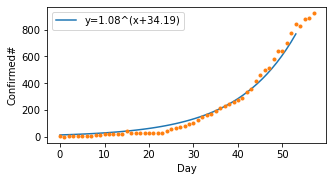

In [13]:
xpoints = np.linspace(0, 53)
plt.figure(figsize=(11, 8.5))

_data = confirmed_sum_jpn
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(321)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
# plt.suptitle("Japan")

_data = confirmed_sum_kr
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(322)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_ir
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(323)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_it
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(324)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_fr
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(325)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_ger
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(326)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
# plt.suptitle("Japan")
# plt.savefig("jpn.png")

In [14]:
xpoints = np.linspace(0, 50)

_data = confirmed_sum_kr

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

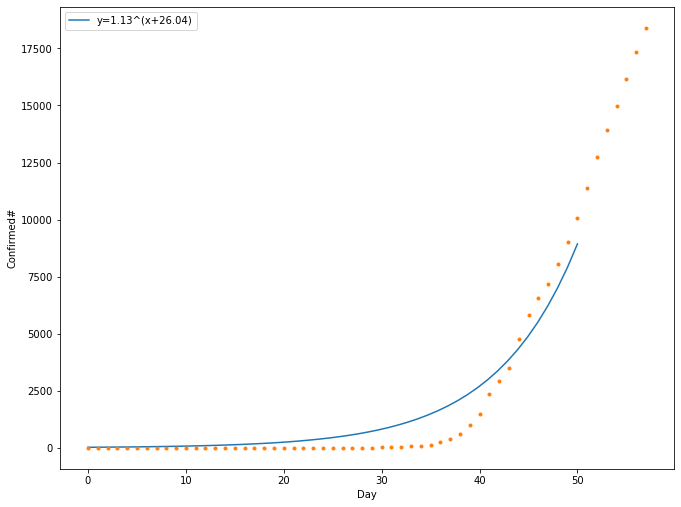

In [15]:
xpoints = np.linspace(0, 50)

_data = confirmed_sum_ir

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

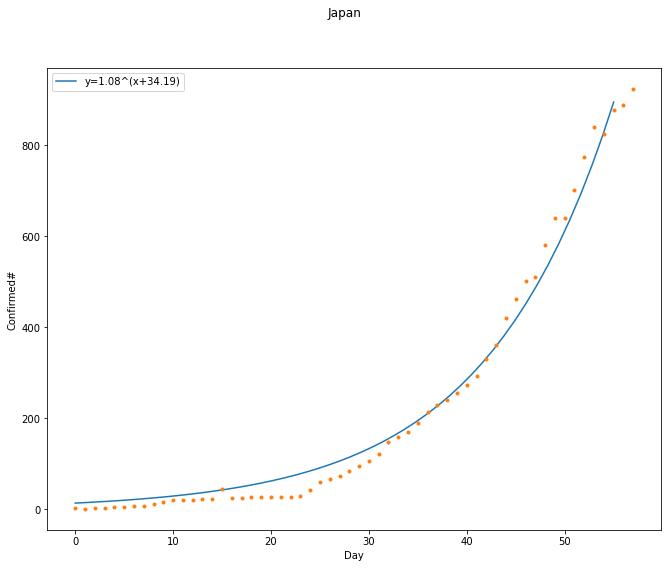

In [16]:
xpoints = np.linspace(0, 55)

_data = confirmed_sum_jpn

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Japan")
plt.savefig("jpn.png")

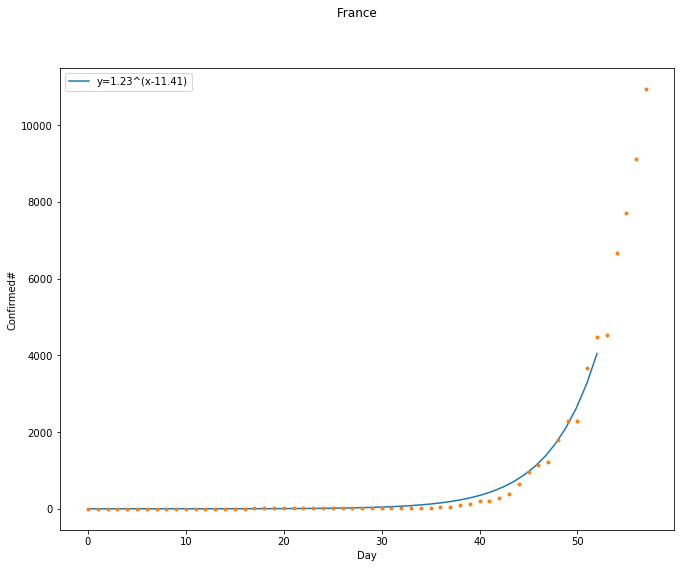

In [17]:
xpoints = np.linspace(0, 52)

_data = confirmed_sum_fr

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("France")
plt.savefig("fr.png")

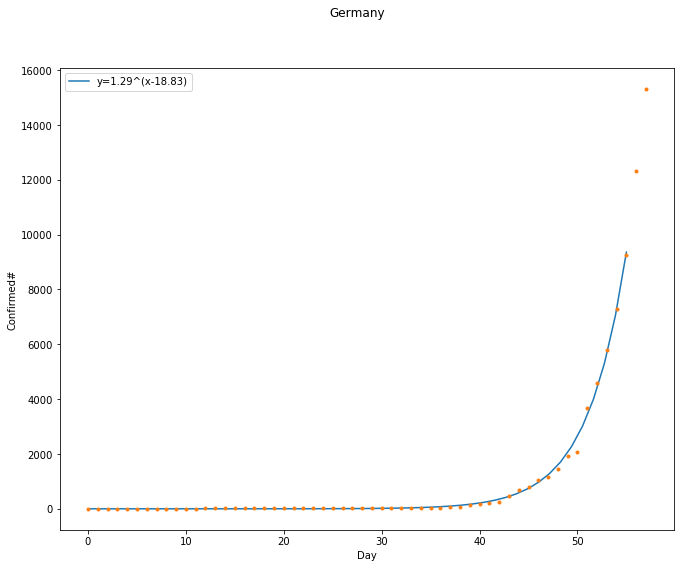

In [18]:
xpoints = np.linspace(0, 55)

_data = confirmed_sum_ger

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Germany")
plt.savefig("ger.png")

In [19]:
xpoints = np.linspace(0, 52)

_data = confirmed_sum_kr

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("South Korea")
plt.savefig("kr.png")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

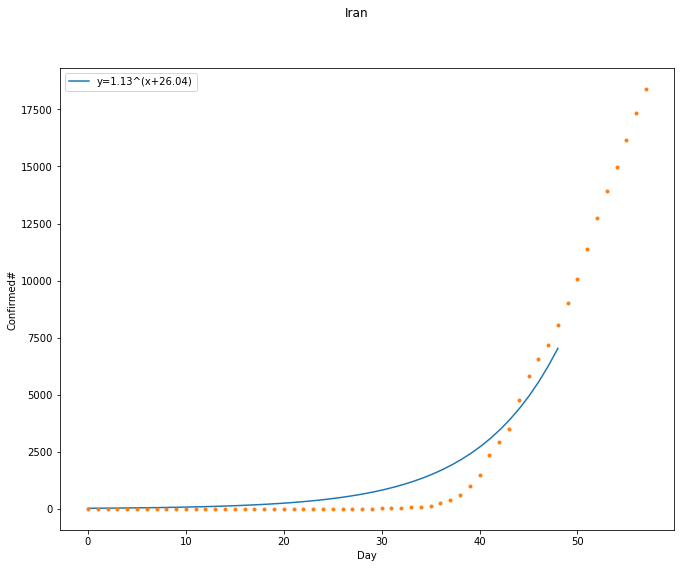

In [20]:
xpoints = np.linspace(0, 48)

_data = confirmed_sum_ir

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Iran")
plt.savefig("ir.png")

In [21]:
xpoints = np.linspace(0, 15)

_data = confirmed_sum_mc[0:10]

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(confirmed_sum_mc))], confirmed_sum_mc, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Mainland China")
plt.savefig("mainland china.png")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [22]:
xpoints = np.linspace(0, 20)

_data = deaths_sum_mc[0:20]

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(deaths_sum_mc))], deaths_sum_mc, ".", label="Actual Data")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Mainland China")
plt.savefig("mainland china.png")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

Text(0.5, 0.98, 'Iran vs Italy')

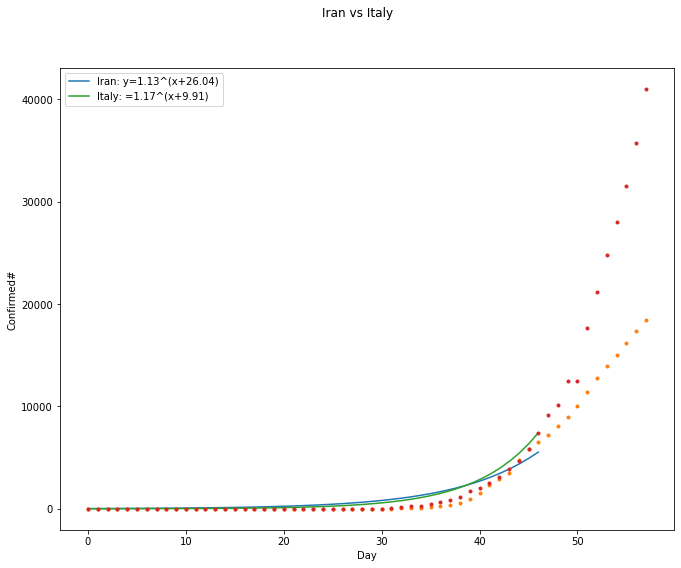

In [23]:
xpoints = np.linspace(0, 46)

_data = confirmed_sum_ir

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Iran: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")

_data = confirmed_sum_it

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
# plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Italy: ={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")

plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Iran vs Italy")
# plt.savefig("ir.png")

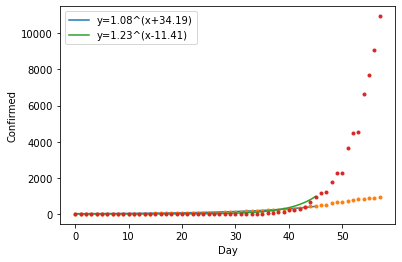

In [24]:
xpoints = np.linspace(0, 45)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(confirmed_sum_jpn))], np.array(confirmed_sum_jpn))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(confirmed_sum_jpn))], confirmed_sum_jpn, ".")
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(confirmed_sum_fr))], np.array(confirmed_sum_fr))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(confirmed_sum_fr))], confirmed_sum_fr, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed")
plt.legend()

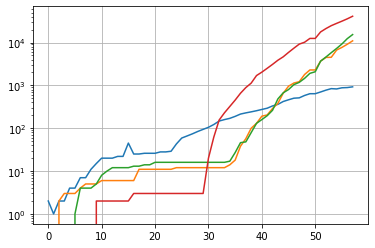

In [25]:
plt.plot(np.array(confirmed_sum_jpn, dtype=float))
plt.plot(np.array(confirmed_sum_fr, dtype=float))
plt.plot(np.array(confirmed_sum_ger, dtype=float))
plt.plot(np.array(confirmed_sum_it, dtype=float))
plt.yscale("log")
plt.grid()

In [26]:
confirmed[confirmed["Province/State"]=="King County, WA"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
347,"King County, WA",US,47.6062,-122.3321,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
464,NaN,Chad,15.4542,18.7322,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
465,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
466,NaN,Fiji,-17.7134,178.0650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
